<a href="https://colab.research.google.com/github/Jamolkhon5/TestPriject/blob/main/%D0%A0%D0%B0%D1%81%D0%BF%D0%BE%D0%B7%D0%BD%D0%B0%D0%BD%D0%B8%D0%B5_%D1%86%D0%B8%D1%84%D1%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten
%matplotlib inline

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()



11490434/11490434 [==============================] - 0s 0us/step


In [3]:
#стандартизация входных данных
x_train = x_train /255
x_test = x_test / 255



In [4]:
y_train_cat = keras.utils.to_categorical(y_train,10)
y_test_cat = keras.utils.to_categorical(y_test,10)

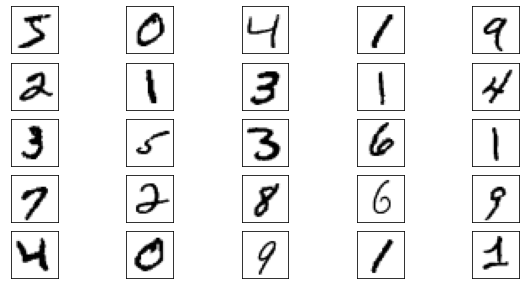

In [5]:
#отоброжение первых 25 изоброжений из обучающей выборке
plt.figure(figsize=(10,5))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i],cmap=plt.cm.binary)

plt.show()

In [6]:
model = keras.Sequential([
    Flatten(input_shape = (28,28,1)),
    Dense(128, activation = 'relu'),
    Dense(10, activation = 'softmax')
])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


In [7]:
model.compile(optimizer='adam',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])


In [8]:
model.fit(x_train, y_train_cat, batch_size=32, epochs=6, validation_batch_size=0.2)



Epoch 1/6
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2603 - accuracy: 0.9259
Epoch 2/6
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1141 - accuracy: 0.9661
Epoch 3/6
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0776 - accuracy: 0.9765
Epoch 4/6
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0582 - accuracy: 0.9819
Epoch 5/6
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0446 - accuracy: 0.9860
Epoch 6/6
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0354 - accuracy: 0.9889


In [9]:
model.evaluate(x_test,y_test_cat)

313/313 [==============================] - 1s 3ms/step - loss: 0.0756 - accuracy: 0.9772


[0.07559999078512192, 0.9771999716758728]

1/1 [==============================] - 0s 62ms/step
[[2.7324388e-06 3.1676881e-09 1.7278196e-03 6.0174625e-07 4.3818758e-08
  9.3977405e-07 1.1489004e-06 1.7456240e-07 9.9826115e-01 5.4110806e-06]]
Распознание цыфра: 8


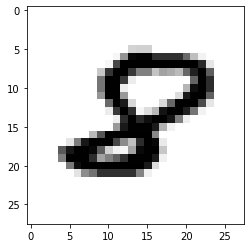

In [12]:
n = 61
x = np.expand_dims(x_test[n],axis = 0)
res = model.predict(x)
print(res)
print(f'Распознание цыфра: {np.argmax(res)}')

plt.imshow(x_test[n], cmap = plt.cm.binary)
plt.show()

In [ ]:
pred = model.predict(x_test)
pred = np.argmax(pred,axis=1)

print(pred.shape)

print(pred[:20])
print(y_test[:20])

313/313 [==============================] - 1s 2ms/step
(10000,)
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


In [ ]:
mask = pred == y_test
print(mask[:10])

x_false = x_test[~mask]
y_false = x_test[~mask]

[ True  True  True  True  True  True  True  True  True  True]


In [ ]:
print(x_false.shape)

(212, 28, 28)


Значение сети: 7


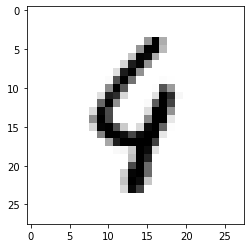

Значение сети: 2


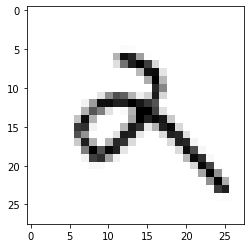

Значение сети: 1


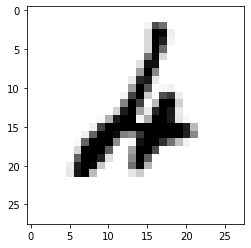

Значение сети: 0


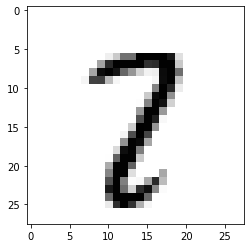

Значение сети: 4


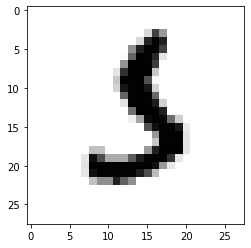

In [ ]:
for i in range(5):
    print('Значение сети: '+str(y_test[i]))
    plt.imshow(x_false[i], cmap = plt.cm.binary)
    plt.show()